v2 : Only for Viualization

In [1]:
##importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_recovered = pd.read_csv('time_series_covid19_recovered_global.csv')
df_deaths = pd.read_csv('time_series_covid19_deaths_global.csv')

In [3]:
df_confirmed.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,37424,37431,37551,37596,37599,37599,37599,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143,38162,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6971,7117,7260,7380,7499,7654,7812,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279,9380,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535


In [4]:
df_recovered.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,26714,26714,27166,27166,27166,27166,27166,27681,28016,28016,28180,28360,28440,29042,29046,29059,29063,29089,29089,29231,29315,29390,29713,30082,30537,30557,30715,31048,31129,31154,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3616,3695,3746,3794,3816,3871,3928,3986,4096,4184,4332,4413,4530,4633,4791,4923,5020,5139,5214,5441,5582,5732,5882,5976,6106,6186,6239,6284,6346,6443,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995


In [5]:
df_deaths.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1363,1363,1370,1375,1375,1375,1375,1385,1385,1385,1387,1389,1397,1401,1401,1402,1402,1402,1402,1406,1409,1409,1409,1409,1412,1415,1418,1420,1420,1420,1420,1420,1425,1426,1436,1436,1437,1437,1441,1444
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,213,219,225,228,230,232,234,238,240,245,250,254,259,263,266,271,275,280,284,290,296,301,306,312,316,319,321,322,324,327,330,334,338,340,343,347,353,358,362,364


In [6]:
df_confirmed = df_confirmed.drop(['Lat', 'Long'],  axis=1).sort_values(by=['Country/Region'])
df_recovered =  df_recovered.drop(['Lat', 'Long'],  axis=1).sort_values(by=['Country/Region'])
df_deaths = df_deaths.drop(['Lat', 'Long'],   axis=1).sort_values(by=['Country/Region'])

In [7]:
import datetime
dates_conf = pd.to_datetime(df_confirmed.columns[2:]).date
print('Length:', dates_conf.shape, 'Starting date:', dates_conf[0], 'Ending Date', dates_conf[243])
dates_rec = pd.to_datetime(df_recovered.columns[2:]).date
print('Length:', dates_rec.shape, 'Starting date:', dates_rec[0], 'Ending Date', dates_rec[243])
dates_deaths = pd.to_datetime(df_deaths.columns[2:]).date
print('Length:', dates_deaths.shape, 'Starting date:', dates_deaths[0], 'Ending Date', dates_deaths[243])

Length: (244,) Starting date: 2020-01-22 Ending Date 2020-09-21
Length: (244,) Starting date: 2020-01-22 Ending Date 2020-09-21
Length: (244,) Starting date: 2020-01-22 Ending Date 2020-09-21


Therefore all the datasets have same starting date and ending date

In [8]:
## MELTING THE DATA
conf_melted = df_confirmed.melt(id_vars=['Province/State', 'Country/Region'], 
                              value_vars=df_confirmed.columns[2:], 
                              var_name='Date',
                              value_name='Confirmed')
conf_melted = conf_melted.groupby(['Date', 'Country/Region']).aggregate({'Confirmed': 'sum'})
conf_melted

Confirmed
Date    Country/Region               
1/22/20 Afghanistan                 0
        Albania                     0
        Algeria                     0
        Andorra                     0
        Angola                      0
...                               ...
9/9/20  West Bank and Gaza      27919
        Western Sahara             10
        Yemen                    1999
        Zambia                  13112
        Zimbabwe                 7429

[45872 rows x 1 columns]

In [9]:
rec_melted = df_recovered.melt(id_vars=['Province/State', 'Country/Region'], 
                              value_vars=df_recovered.columns[2:], 
                              var_name='Date',
                              value_name='Recovered')
rec_melted = rec_melted.groupby(['Date', 'Country/Region']).aggregate({'Recovered': 'sum'})
rec_melted

Recovered
Date    Country/Region               
1/22/20 Afghanistan                 0
        Albania                     0
        Algeria                     0
        Andorra                     0
        Angola                      0
...                               ...
9/9/20  West Bank and Gaza      18466
        Western Sahara              8
        Yemen                    1209
        Zambia                  11839
        Zimbabwe                 5542

[45872 rows x 1 columns]

In [10]:
deaths_melted = df_deaths.melt(id_vars=['Province/State', 'Country/Region'], 
                              value_vars=df_deaths.columns[2:], 
                              var_name='Date',
                              value_name='Deaths')
deaths_melted = deaths_melted.groupby(['Date', 'Country/Region']).aggregate({'Deaths': 'sum'})
deaths_melted

Deaths
Date    Country/Region            
1/22/20 Afghanistan              0
        Albania                  0
        Algeria                  0
        Andorra                  0
        Angola                   0
...                            ...
9/9/20  West Bank and Gaza     192
        Western Sahara           1
        Yemen                  576
        Zambia                 300
        Zimbabwe               222

[45872 rows x 1 columns]

In [11]:
##Combining the dataset
dataset = pd.concat([conf_melted, rec_melted['Recovered'], deaths_melted['Deaths']], axis = 1, sort = False).reset_index()
dataset

,Date,Country/Region,Confirmed,Recovered,Deaths
0,1/22/20,Afghanistan,0,0,0
1,1/22/20,Albania,0,0,0
2,1/22/20,Algeria,0,0,0
3,1/22/20,Andorra,0,0,0
4,1/22/20,Angola,0,0,0
...,...,...,...,...,...
45867,9/9/20,West Bank and Gaza,27919,18466,192
45868,9/9/20,Western Sahara,10,8,1
45869,9/9/20,Yemen,1999,1209,576
45870,9/9/20,Zambia,13112,11839,300


In [12]:
def format_time(datetime_str):    
    dates = datetime.datetime.strptime(datetime_str, '%m/%d/%y')
    return dates  

dataset['Date'] = dataset['Date'].apply(format_time)
dataset

,Date,Country/Region,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
45867,2020-09-09,West Bank and Gaza,27919,18466,192
45868,2020-09-09,Western Sahara,10,8,1
45869,2020-09-09,Yemen,1999,1209,576
45870,2020-09-09,Zambia,13112,11839,300


In [13]:
##filling the Nan values withh 0
dataset.fillna(0, inplace=True)
dataset

,Date,Country/Region,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
45867,2020-09-09,West Bank and Gaza,27919,18466,192
45868,2020-09-09,Western Sahara,10,8,1
45869,2020-09-09,Yemen,1999,1209,576
45870,2020-09-09,Zambia,13112,11839,300


In [14]:
dataset.isnull().any(axis=0)

Date              False
Country/Region    False
Confirmed         False
Recovered         False
Deaths            False
dtype: bool

In [15]:
## Checking for Negative values
dataset.loc[dataset['Confirmed'] < 0 ]
dataset.loc[dataset['Recovered'] < 0]
dataset.loc[dataset['Deaths'] < 0]

,Date,Country/Region,Confirmed,Recovered,Deaths


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45872 entries, 0 to 45871
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            45872 non-null  datetime64[ns]
 1   Country/Region  45872 non-null  object        
 2   Confirmed       45872 non-null  int64         
 3   Recovered       45872 non-null  int64         
 4   Deaths          45872 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.8+ MB


In [17]:
dataset['Recovered'] = dataset['Recovered'].astype('int64')
dataset['Country/Region'] = dataset['Country/Region'].astype('string')

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45872 entries, 0 to 45871
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            45872 non-null  datetime64[ns]
 1   Country/Region  45872 non-null  string        
 2   Confirmed       45872 non-null  int64         
 3   Recovered       45872 non-null  int64         
 4   Deaths          45872 non-null  int64         
dtypes: datetime64[ns](1), int64(3), string(1)
memory usage: 1.8 MB


In [19]:
dataset.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

### Finding total cases

In [20]:
Total_cases = pd.DataFrame(dataset.groupby(['Country/Region']).sum()).reset_index()
Total_cases

,Country/Region,Confirmed,Recovered,Deaths
0,Afghanistan,4056576,2398631,126077
1,Albania,679314,384363,20165
2,Algeria,3483151,2367555,158731
3,Andorra,158056,119743,8376
4,Angola,155898,57229,6645
...,...,...,...,...
183,West Bank and Gaza,1419283,800335,9603
184,Western Sahara,1461,1096,119
185,Yemen,173715,83523,48329
186,Zambia,721797,608001,17339


In [21]:
#Checking if Recovered cases are greater than Confirmed Cases
print(Total_cases.query('Confirmed < Recovered'))

#Checking if Death cases are greater than Confirmed Cases
print(Total_cases.query('Confirmed < Deaths'))

Empty DataFrame
Columns: [Country/Region, Confirmed, Recovered, Deaths]
Index: []
Empty DataFrame
Columns: [Country/Region, Confirmed, Recovered, Deaths]
Index: []


### Finding Recovery Rate and Mortality Rate

In [22]:
Total_cases['Recovery_rate']  = (Total_cases['Recovered']/Total_cases['Confirmed'])*100
Total_cases['Mortality_rate'] =  (Total_cases['Deaths']/Total_cases['Confirmed'])*100
Total_cases.columns

Index(['Country/Region', 'Confirmed', 'Recovered', 'Deaths', 'Recovery_rate',
       'Mortality_rate'],
      dtype='object')

In [23]:
## Checking for Negative values
print(Total_cases.loc[Total_cases['Recovery_rate'] < 0 ])
print(Total_cases.loc[Total_cases['Mortality_rate'] < 0])

Empty DataFrame
Columns: [Country/Region, Confirmed, Recovered, Deaths, Recovery_rate, Mortality_rate]
Index: []
Empty DataFrame
Columns: [Country/Region, Confirmed, Recovered, Deaths, Recovery_rate, Mortality_rate]
Index: []


In [24]:
#Total_cases.to_csv('total_cases.csv')

### Finding New cases i.e daily increment in the number of cases and Growth Rate

In [25]:
df = dataset.groupby('Date')[['Confirmed', 'Recovered', 'Deaths', 'Country/Region']].sum().reset_index()
df['New_cases'] = df['Confirmed'] - df['Confirmed'].shift(1)
df['Growth_rate'] = (df['New_cases'] / df['New_cases'].shift(1) )*100
df

,Date,Confirmed,Recovered,Deaths,New_cases,Growth_rate
0,2020-01-22,555,28,17,NaN,NaN
1,2020-01-23,654,30,18,99.0,NaN
2,2020-01-24,941,36,26,287.0,289.898990
3,2020-01-25,1434,39,42,493.0,171.777003
4,2020-01-26,2118,52,56,684.0,138.742394
...,...,...,...,...,...,...
239,2020-09-17,30175313,20527185,946061,313364.0,103.077890
240,2020-09-18,30499534,20778990,951767,324221.0,103.464661
241,2020-09-19,30780755,21016801,956999,281221.0,86.737441
242,2020-09-20,31021972,21252815,960695,241217.0,85.774889


In [26]:
df['Growth_rate'] = df['Growth_rate'].fillna(0)
df['New_cases'] = df['New_cases'].fillna(0)

In [27]:
df.isnull().any(axis=0)

Date           False
Confirmed      False
Recovered      False
Deaths         False
New_cases      False
Growth_rate    False
dtype: bool

## VISUALIZATIONS

## TOP 10 countries with MAX number of confirmed cases

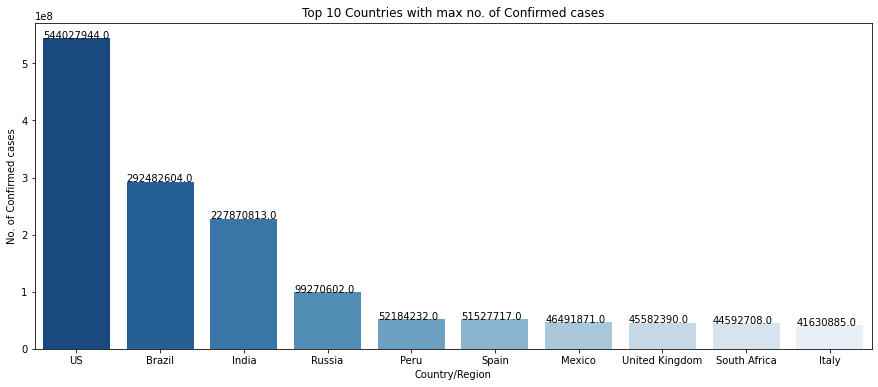

-----------------------------------------------------------------------------------------------------------------
Insights: Top 10 Countries with max no. of Confirmed cases
     Country/Region  Confirmed
174              US  544027944
23           Brazil  292482604
79            India  227870813
140          Russia   99270602
134            Peru   52184232
158           Spain   51527717
113          Mexico   46491871
178  United Kingdom   45582390
156    South Africa   44592708
85            Italy   41630885
Highest number of confirmed cases are reported in US with a total of 544027944 Confirmed cases


['US',
 'Brazil',
 'India',
 'Russia',
 'Peru',
 'Spain',
 'Mexico',
 'United Kingdom',
 'South Africa',
 'Italy']

In [28]:
value_top10 = Total_cases.nlargest(10, ['Confirmed']) 
plt.figure(figsize=(15,6))
x = np.array((value_top10['Country/Region']))
y = np.array((value_top10['Confirmed']))
ax = sns.barplot(x, y, palette= "Blues_r")
plt.xlabel("Country/Region")
plt.ylabel("No. of Confirmed cases")
plt.title("Top 10 Countries with max no. of Confirmed cases")

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()+30))
plt.show()
print('-----------------------------------------------------------------------------------------------------------------')
print('Insights: Top 10 Countries with max no. of Confirmed cases')
Top1_conf = Total_cases.loc[Total_cases.Confirmed == Total_cases['Confirmed'].max(),'Country/Region']
print(Total_cases.sort_values(by = 'Confirmed' , ascending = False)[['Country/Region','Confirmed']].head(10))
print('Highest number of confirmed cases are reported in', Top1_conf.values[0], 'with a total of', Total_cases['Confirmed'].max(), 'Confirmed cases')
top10_country = list((value_top10['Country/Region']))
top10_country

## TOP 10 countries with MAX number of recovered cases

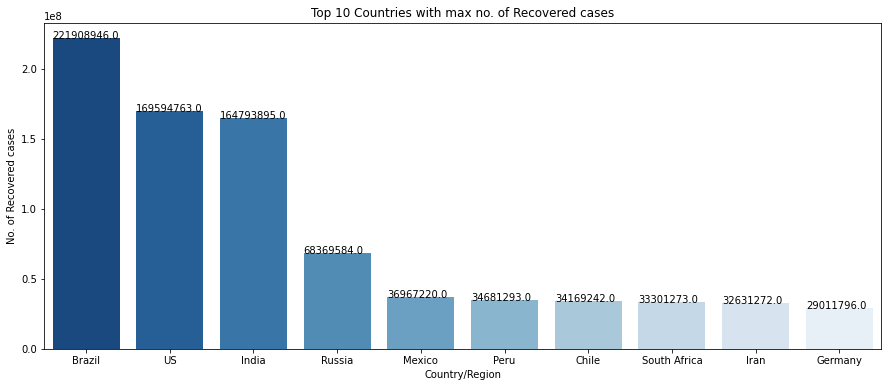

-----------------------------------------------------------------------------------------------------------------
Insights: Top 10 Countries with max no. of Recovered cases
    Country/Region  Recovered
23          Brazil  221908946
174             US  169594763
79           India  164793895
140         Russia   68369584
113         Mexico   36967220
134           Peru   34681293
35           Chile   34169242
156   South Africa   33301273
81            Iran   32631272
66         Germany   29011796
Highest number of Recovered cases are reported in Brazil with a total of 221908946 recovered cases


In [29]:
value_top10 = Total_cases.nlargest(10, ['Recovered']) 
plt.figure(figsize=(15,6))
x = np.array((value_top10['Country/Region']))
y = np.array((value_top10['Recovered']))
ax = sns.barplot(x, y, palette= "Blues_r")
plt.xlabel("Country/Region")
plt.ylabel("No. of Recovered cases")
plt.title("Top 10 Countries with max no. of Recovered cases")

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()+30))
plt.show()
print('-----------------------------------------------------------------------------------------------------------------')
print('Insights: Top 10 Countries with max no. of Recovered cases')
Top1_conf = Total_cases.loc[Total_cases.Recovered == Total_cases['Recovered'].max(),'Country/Region']
print(Total_cases.sort_values(by = 'Recovered' , ascending = False)[['Country/Region','Recovered']].head(10))
print('Highest number of Recovered cases are reported in', Top1_conf.values[0], 'with a total of', Total_cases['Recovered'].max(), 'recovered cases')

## TOP 10 countries with MAX number of Deaths

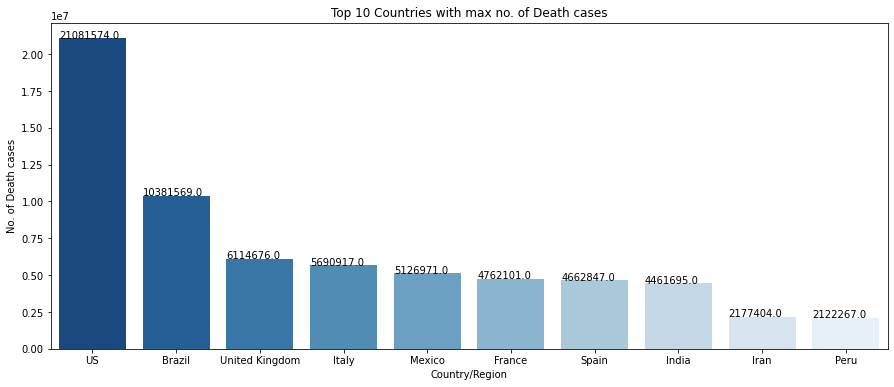

-----------------------------------------------------------------------------------------------------------------
Insights: Top 10 Countries with max no. of Death cases
     Country/Region    Deaths
174              US  21081574
23           Brazil  10381569
178  United Kingdom   6114676
85            Italy   5690917
113          Mexico   5126971
62           France   4762101
158           Spain   4662847
79            India   4461695
81             Iran   2177404
134            Peru   2122267
Highest number of Deaths are reported in US with a total of 21081574 deaths


In [30]:
value_top10 = Total_cases.nlargest(10, ['Deaths']) 
plt.figure(figsize=(15,6))
x = np.array((value_top10['Country/Region']))
y = np.array((value_top10['Deaths']))
ax = sns.barplot(x, y, palette= "Blues_r")
plt.xlabel("Country/Region")
plt.ylabel("No. of Death cases")
plt.title("Top 10 Countries with max no. of Death cases")

for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x(), p.get_height()+30))
plt.show()
print('-----------------------------------------------------------------------------------------------------------------')
print('Insights: Top 10 Countries with max no. of Death cases')
Top1_conf = Total_cases.loc[Total_cases.Deaths == Total_cases['Deaths'].max(),'Country/Region']
print(Total_cases.sort_values(by = 'Deaths' , ascending = False)[['Country/Region','Deaths']].head(10))
print('Highest number of Deaths are reported in', Top1_conf.values[0], 'with a total of', Total_cases['Deaths'].max(), 'deaths')

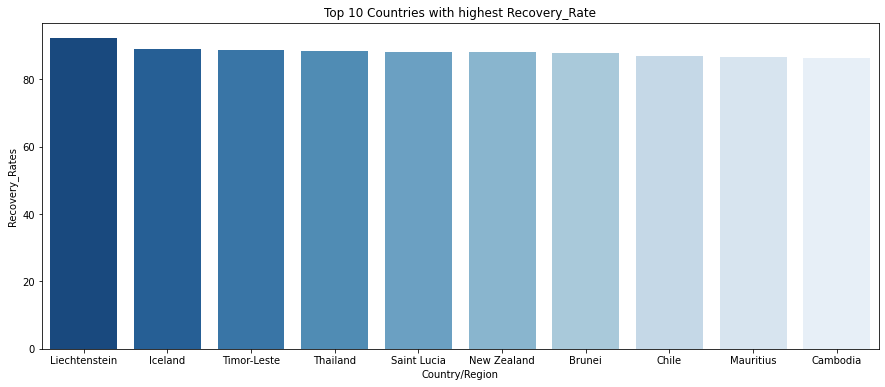

-----------------------------------------------------------------------------------------------------------------
Insights: Top 10 Countries with highest rate of Recovery
    Country/Region  Recovery_rate
101  Liechtenstein      92.265747
78         Iceland      88.950947
169    Timor-Leste      88.620777
168       Thailand      88.538852
143    Saint Lucia      88.294405
123    New Zealand      88.105527
24          Brunei      87.965332
35           Chile      86.883541
112      Mauritius      86.800331
30        Cambodia      86.465671
Country with highest Recover_Rate is  Liechtenstein with a rate of 92.26574741460357


In [31]:
value_top10 = Total_cases.nlargest(10, ['Recovery_rate']) 
plt.figure(figsize=(15,6))
x = np.array((value_top10['Country/Region']))
y = np.array((value_top10['Recovery_rate']))
ax = sns.barplot(x, y, palette= "Blues_r")
plt.xlabel("Country/Region")
plt.ylabel("Recovery_Rates")
plt.title("Top 10 Countries with highest Recovery_Rate")
plt.show()
print('-----------------------------------------------------------------------------------------------------------------')
print('Insights: Top 10 Countries with highest rate of Recovery')
Top1_conf = Total_cases.loc[Total_cases.Recovery_rate == Total_cases['Recovery_rate'].max(),'Country/Region']
print(Total_cases.sort_values(by = 'Recovery_rate' , ascending = False)[['Country/Region','Recovery_rate']].head(10))
print('Country with highest Recover_Rate is ', Top1_conf.values[0], 'with a rate of', Total_cases['Recovery_rate'].max())

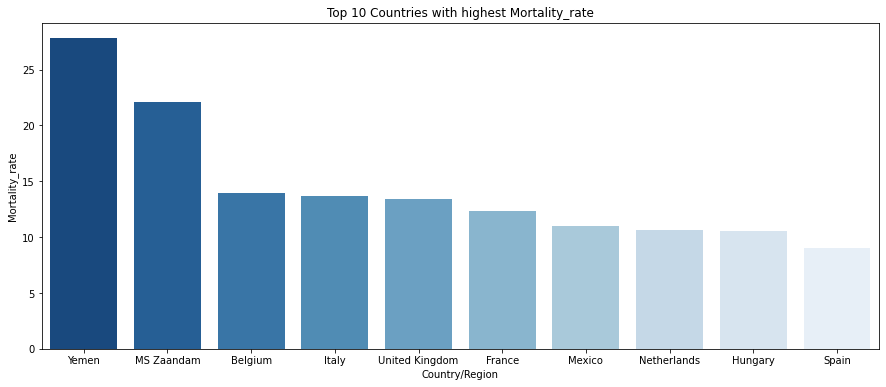

-----------------------------------------------------------------------------------------------------------------
Insights: Top 10 Countries with highest rate of Mortality_rate
     Country/Region  Mortality_rate
185           Yemen       27.820856
104      MS Zaandam       22.109276
16          Belgium       13.922250
85            Italy       13.669940
178  United Kingdom       13.414558
62           France       12.348120
113          Mexico       11.027672
122     Netherlands       10.616524
77          Hungary       10.554243
158           Spain        9.049202
Country with highest Mortality Rate is Yemen with a rate of 27.82085599976974


In [32]:
value_top10 = Total_cases.nlargest(10, ['Mortality_rate']) 
plt.figure(figsize=(15,6))
x = np.array((value_top10['Country/Region']))
y = np.array((value_top10['Mortality_rate']))
ax = sns.barplot(x, y, palette= "Blues_r")
plt.xlabel("Country/Region")
plt.ylabel("Mortality_rate")
plt.title("Top 10 Countries with highest Mortality_rate")
plt.show()
print('-----------------------------------------------------------------------------------------------------------------')
print('Insights: Top 10 Countries with highest rate of Mortality_rate')
Top1_conf = Total_cases.loc[Total_cases.Mortality_rate == Total_cases['Mortality_rate'].max(),'Country/Region']
print(Total_cases.sort_values(by = 'Mortality_rate' , ascending = False)[['Country/Region','Mortality_rate']].head(10))
print('Country with highest Mortality Rate is', Top1_conf.values[0], 'with a rate of', Total_cases['Mortality_rate'].max())

### Analyzing daily Growth Rate

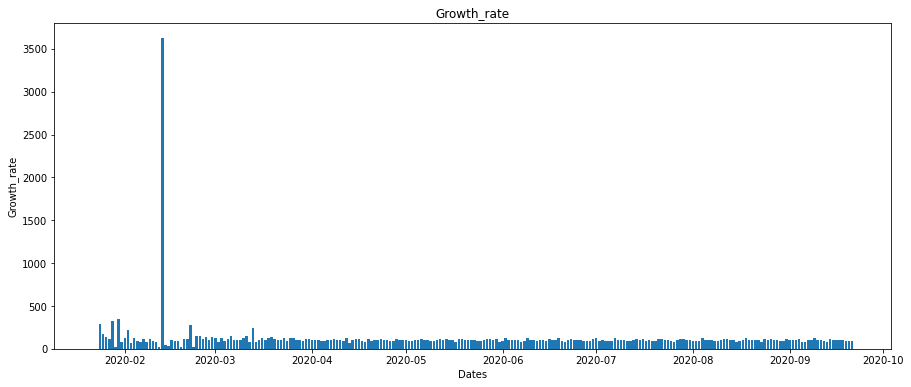

In [33]:
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
plt.figure(figsize=(15,6))
x = df['Date']
y = df['Growth_rate']
ax = plt.bar(x, y)
plt.xlabel("Dates")
plt.ylabel("Growth_rate")
plt.title("Growth_rate")
plt.show()

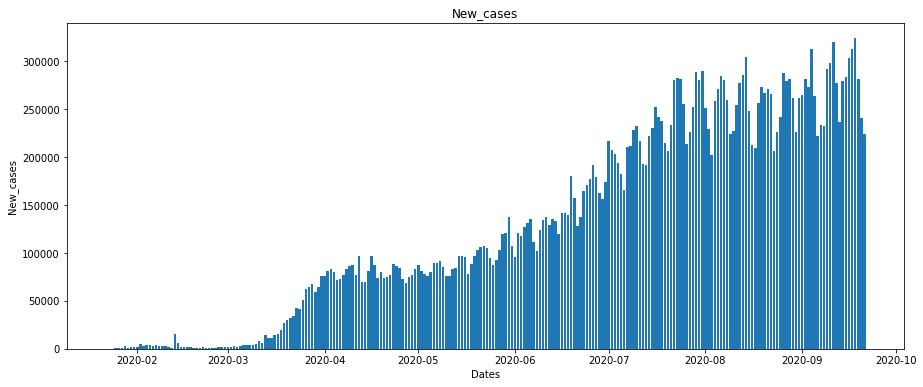

In [34]:
plt.figure(figsize=(15,6))
x = df['Date']
y = df['New_cases']
ax = plt.bar(x, y)
plt.xlabel("Dates")
plt.ylabel("New_cases")
plt.title("New_cases")
plt.show()

# Worldwide trend

In [35]:
Total_confirmed = Total_cases['Confirmed'].sum()
Total_recovered = Total_cases['Recovered'].sum()
Total_deaths = Total_cases['Deaths'].sum()
Total_active = Total_confirmed - Total_recovered - Total_deaths
print('Total confirmed cases across the world --->',Total_confirmed)
print('Total recovered cases across the world --->',Total_recovered)
print('Total deaths across the world          --->',Total_deaths)
print('Total active cases across the world    --->', Total_active)

Total confirmed cases across the world ---> 2166632218
Total recovered cases across the world ---> 1261785573
Total deaths across the world          ---> 89003981
Total active cases across the world    ---> 815842664


In [36]:
fig = go.Figure()
fig.add_trace(go.Indicator(mode="number",value=int(Total_confirmed),number={"valueformat":"0.f"},
             title={"text":"Total_Confirmed"},domain={"row":0,"column":0}))

fig.add_trace(go.Indicator(mode="number",value=int(Total_deaths),number={"valueformat":"0.f"},
             title={"text":"Total_Deaths"},domain={"row":0,"column":1}))

fig.add_trace(go.Indicator(mode="number",value=int(Total_recovered),number={"valueformat":"0.f"},
             title={"text":"Total_Recovered"},domain={"row":1,"column":0}))

fig.add_trace(go.Indicator(mode="number",value=int(Total_active),number={"valueformat":"0.f"},
             title={"text":"Total_Active_Cases"},domain={"row":1,"column":1}))

fig.update_layout(grid={"rows":2,"columns":2,"pattern":"independent"})
fig.show()

## Cases All across the world

### Confirmed cases

In [37]:
fig = px.choropleth(Total_cases,locations="Country/Region",locationmode="country names",
                    color_continuous_scale="dense",
                    color=np.log10(Total_cases["Confirmed"]),range_color=(0,12))
fig.show()

### Recovered Cases

In [38]:
fig = px.choropleth(Total_cases,locations="Country/Region",locationmode="country names",
                    color_continuous_scale=px.colors.sequential.Viridis,
                    color=np.log10(Total_cases["Recovered"]),range_color=(0,12))
fig.show()

### Deaths

In [39]:
fig = px.choropleth(Total_cases,locations="Country/Region",locationmode="country names",
                    color_continuous_scale='Inferno',
                    color=np.log10(Total_cases["Deaths"]),range_color=(0,12))
fig.show()

In [40]:
df_top10 = dataset[dataset['Country/Region'].isin(top10_country)]
df_top10

,Date,Country/Region,Confirmed,Recovered,Deaths
23,2020-01-22,Brazil,0,0,0
79,2020-01-22,India,0,0,0
85,2020-01-22,Italy,0,0,0
113,2020-01-22,Mexico,0,0,0
134,2020-01-22,Peru,0,0,0
...,...,...,...,...,...
45824,2020-09-09,Russia,1037526,854069,18080
45840,2020-09-09,South Africa,642431,569935,15168
45842,2020-09-09,Spain,543379,150376,29628
45858,2020-09-09,US,6360212,2387479,190859


## Plots to see the trend in top 10 Countries

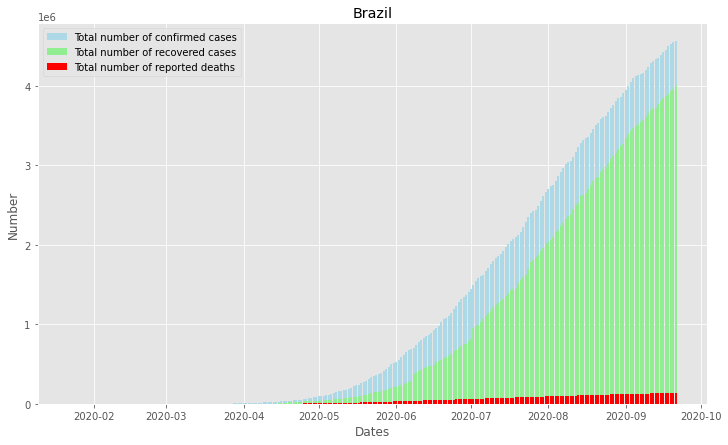

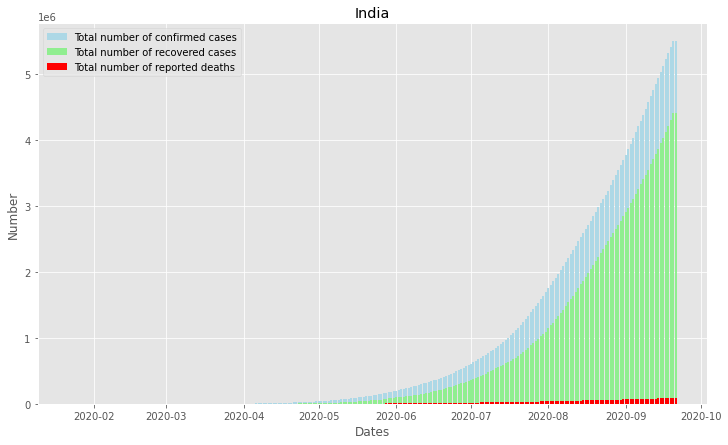

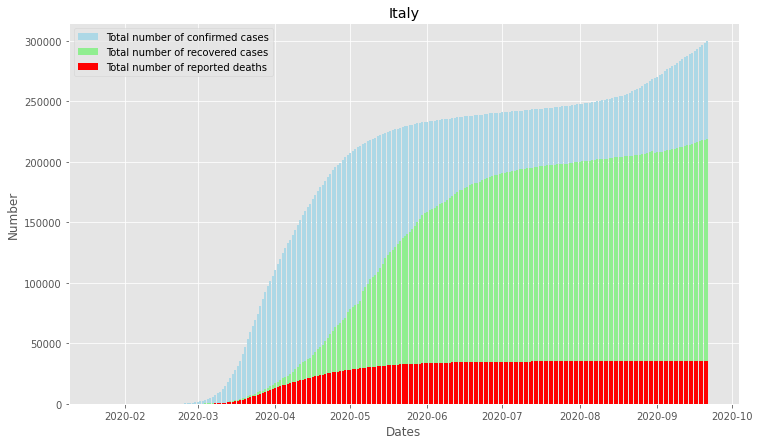

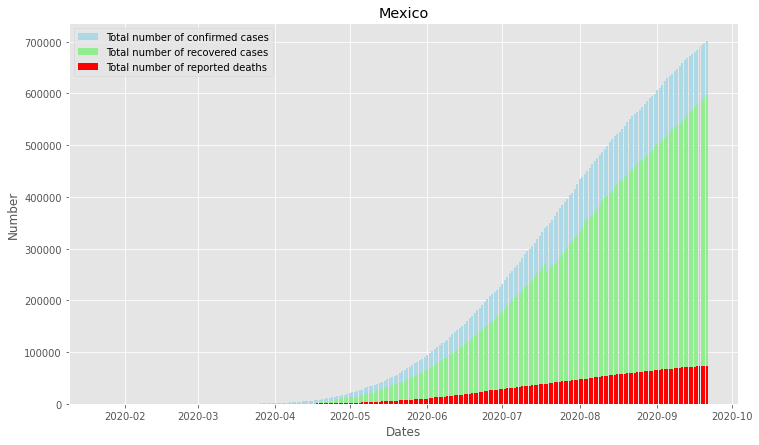

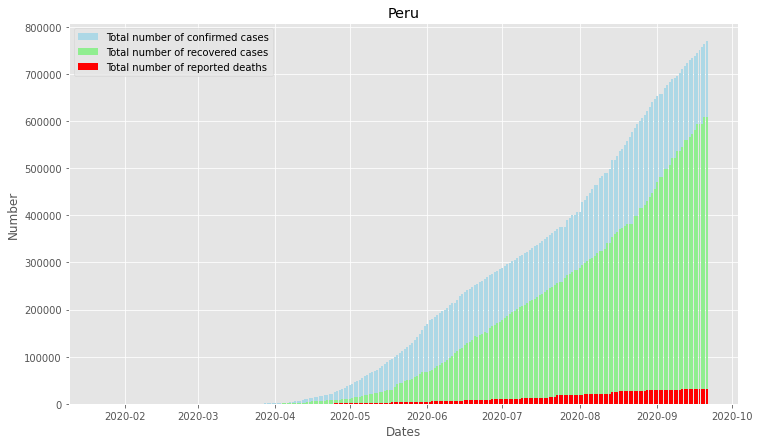

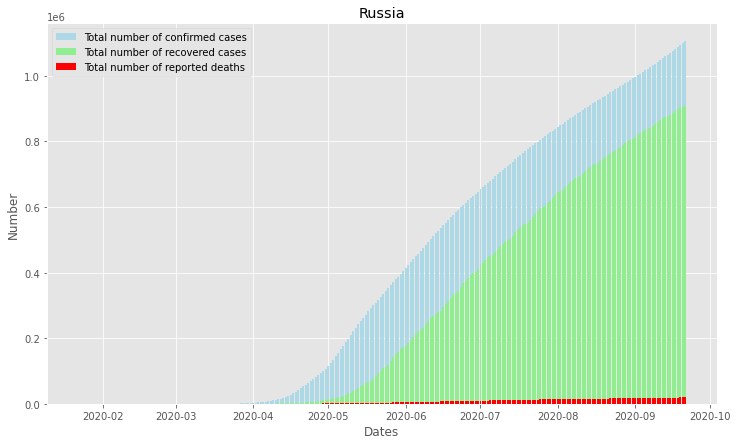

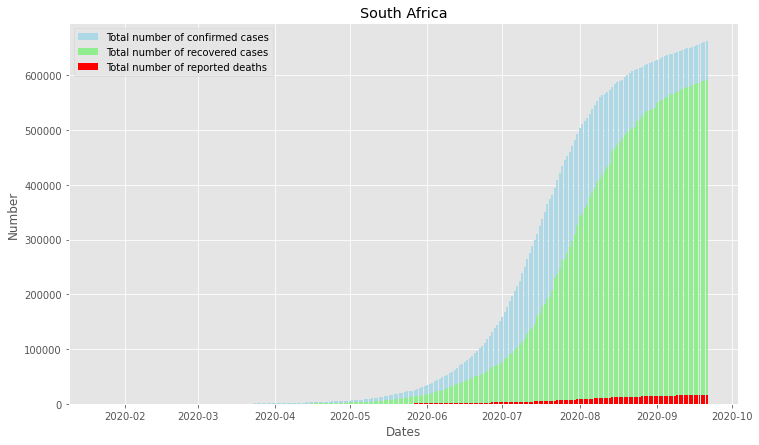

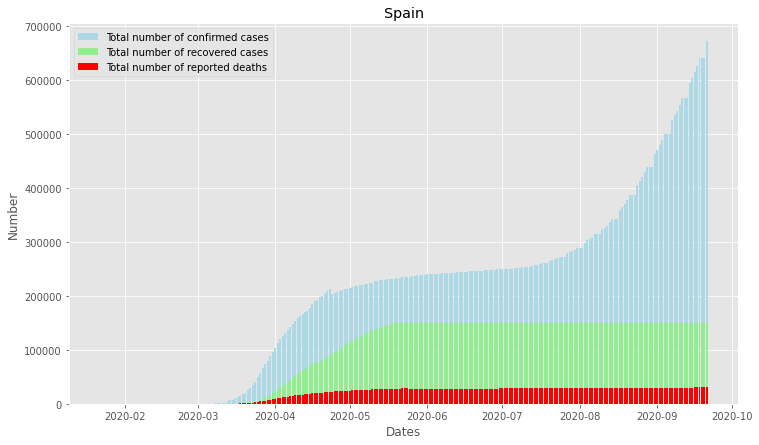

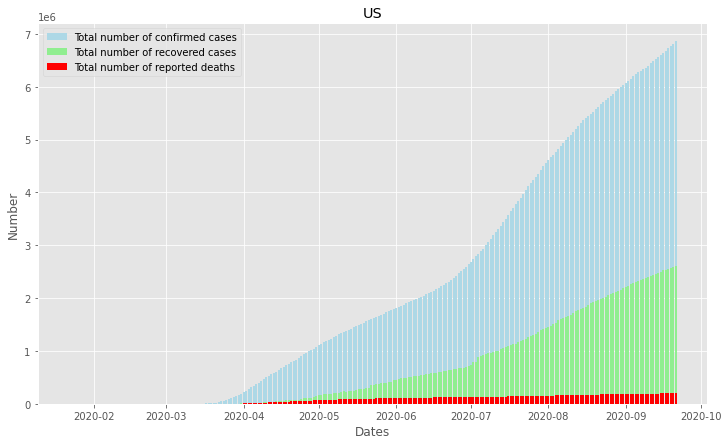

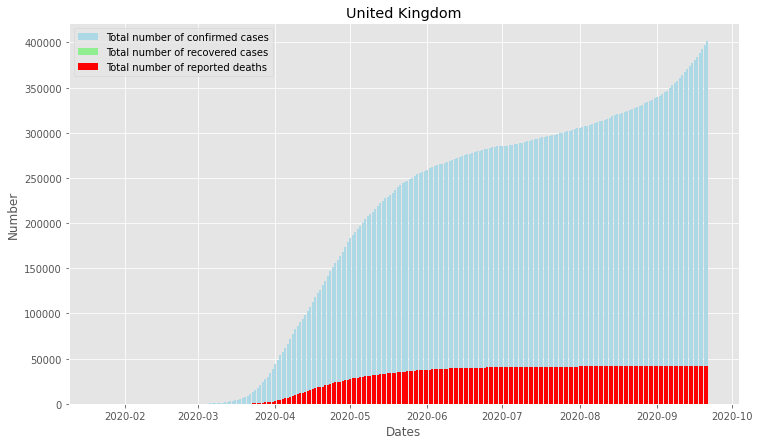

In [41]:
##implementing the grammar of the graphics plotting
plt.style.use('ggplot')

for country, data_country in df_top10.groupby("Country/Region"):    
    dates = list(data_country['Date'])
    confirmed = list(data_country.Confirmed)
    recovered= list(data_country.Recovered)
    deaths = list(data_country.Deaths)
    plt.figure(figsize=(12,7))
    plt.bar(dates, confirmed, color='lightblue', label="Total number of confirmed cases")
    plt.bar(dates, recovered, color='lightgreen',label="Total number of recovered cases")
    plt.bar(dates, deaths, color='red', label="Total number of reported deaths")
    plt.xlabel("Dates")
    plt.ylabel("Number")
    plt.title(country)
    plt.legend()
    plt.show()

## Analyzing increase in the number of cases in 10 top countries

### Confirmed cases

In [42]:
plot_confirmed = px.scatter(df_top10,x="Date",y="Confirmed",color="Country/Region")
plot_confirmed

Insights: US had a sharp increase in the number of cases from April 2020 onwards 

### Recovered cases

In [43]:
plot_recovered = px.scatter(df_top10,x="Date",y="Recovered",color="Country/Region")
plot_recovered

Insights: Brazil and India have more recoveries from June 2020

### Deaths

In [44]:
plot_deaths = px.scatter(df_top10,x="Date",y="Deaths",color="Country/Region")
plot_deaths

Insights: US reported highest number of deaths from April